In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
train_dir = 'Training'
test_dir = 'Testing'

In [4]:

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # Use categorical for multi-class classification


Found 5712 images belonging to 4 classes.


In [7]:
# Check class indices
print("Class indices:", train_generator.class_indices)

Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [8]:
# Image data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')  # Multi-class classification


Found 1312 images belonging to 4 classes.


In [10]:
# Build the CNN model
model = Sequential()


In [11]:
# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, notumor, pituitary

C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    epochs=10) 

Epoch 1/10


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.4288 - loss: 1.1709 - val_accuracy: 0.5282 - val_loss: 1.3264
Epoch 2/10


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.6445 - loss: 0.8499 - val_accuracy: 0.5191 - val_loss: 1.4416
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.6920 - loss: 0.7632 - val_accuracy: 0.5358 - val_loss: 1.4908
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.7118 - loss: 0.7146 - val_accuracy: 0.6296 - val_loss: 1.0664
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7510 - loss: 0.6510 - val_accuracy: 0.6593 - val_loss: 0.8854
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


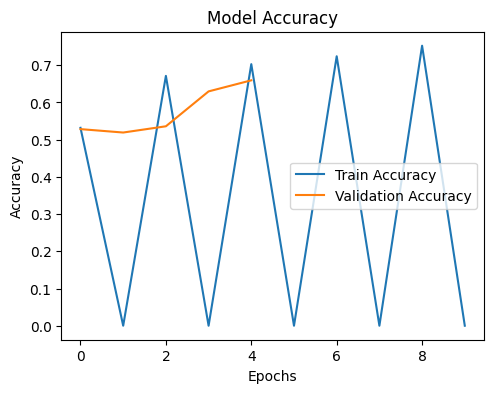

In [14]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

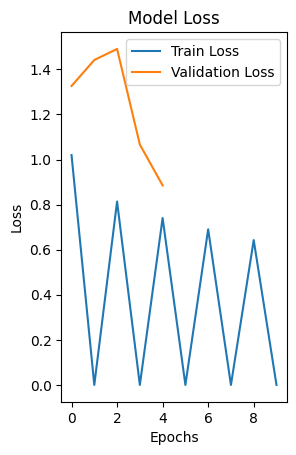

In [15]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


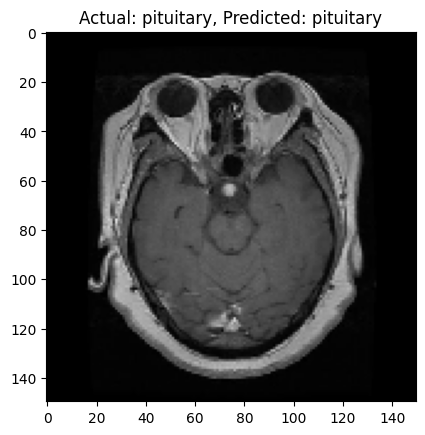

In [17]:
def display_prediction(image_path, actual_label):
    
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(img)
    

    # Set title with actual and predicted labels
    if actual_label is not None:
        plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    else:
        plt.title(f'Predicted: {predicted_label}')

    plt.show()


display_prediction('Testing/pituitary/Te-pi_0010.jpg', actual_label='pituitary')  